# Predict Bike Sharing Demand with AutoGluon Template

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install torch==2.1.2 torchvision==0.16.2 --index-url https://download.pytorch.org/whl/cpu
!apt-get update; apt-get install -y graphviz graphviz-dev
!pip install autogluon kaggle pygraphviz dask[dataframe]

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.1.2%2Bcpu-cp310-cp310-linux_x86_64.whl (184.9 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.16.2%2Bcpu-cp310-cp310-linux_x86_64.whl (1.5 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.17.1+cu121
    Uninstalling torchvision-0.17.1+cu121:
      Successfully uninstalled torchvision-0.17.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 2.1.2+cpu which is incompatible.
torchtext 0.17.1 requires torch==2.2.1, but you have torch 2.1.2+cpu which is incompatible.
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://develo

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Setup Kaggle API Key

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 76.2MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Read the CSV file into a DataFrame
train = pd.read_csv("/content/train.csv")

# Convert the 'datetime' column to datetime objects
train['datetime'] = pd.to_datetime(train['datetime'])



In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test =pd.read_csv('/content/test.csv')
#convert the 'dataetime' column to dataetime objects
test['datetime']=pd.to_datetime(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('/content/sampleSubmission.csv')
submission['datetime']=pd.to_datetime(submission ['datetime'])

submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_224055"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_224055/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 183 seconds

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.089702  root_mean_squared_error      16.822281  396.674795                0.001057           0.048171            3       True         12
1   RandomForestMSE_BAG_L2  -53.430473  root_mean_squared_error      12.516176  304.884785                0.751352          47.206190            2       True         11
2          LightGBM_BAG_L2  -55.019440  root_mean_squared_error      12.113995  287.313753                0.349171          29.635158            2       True         10
3        LightGBMXT_BAG_L2  -60.341859  root_mean_squared_error      15.720702  319.785276                3.955878          62.106681            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.080796    0.048786   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.82960227970324,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    22.947689
1    42.555000
2    45.771328
3    49.294098
4    51.870911
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.390739
std        89.894890
min         2.936829
25%        19.548151
50%        64.044716
75%       167.690323
max       367.711975
Name: count, dtype: float64

In [ ]:
# Count negative values in predicted counts
negative_pred_count = sum(1 for count in predictions if count < 0)

# Total number of predictions
total_predictions = len(predictions)

# Total positive prediction values
total_positive_predictions = total_predictions - negative_pred_count

print("Total predictions                :", total_predictions)
print("Total positive prediction values :", total_positive_predictions)
print("Total negative prediction values :", negative_pred_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [ ]:
# Set them to zero
# Set negative values to zero
predictions = predictions.clip(lower=0)

# Check if negative values have been set to zero
negative_pred_count_after = (predictions< 0).sum()
print("Total negative prediction values after setting to zero:", negative_pred_count_after)


Total negative prediction values after setting to zero: 0


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 544kB/s]  
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-04-29 22:56:42  first raw submission               complete  1.80837      1.80837       
submission_new_hpo.csv       2024-04-29 21:58:44  new features with hyperparameters  complete  0.6608       0.6608        
submission_new_hpo.csv       2024-04-29 21:53:45  new features with hyperparameters  complete  0.6608       0.6608        


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
import matplotlib.pyplot as plt


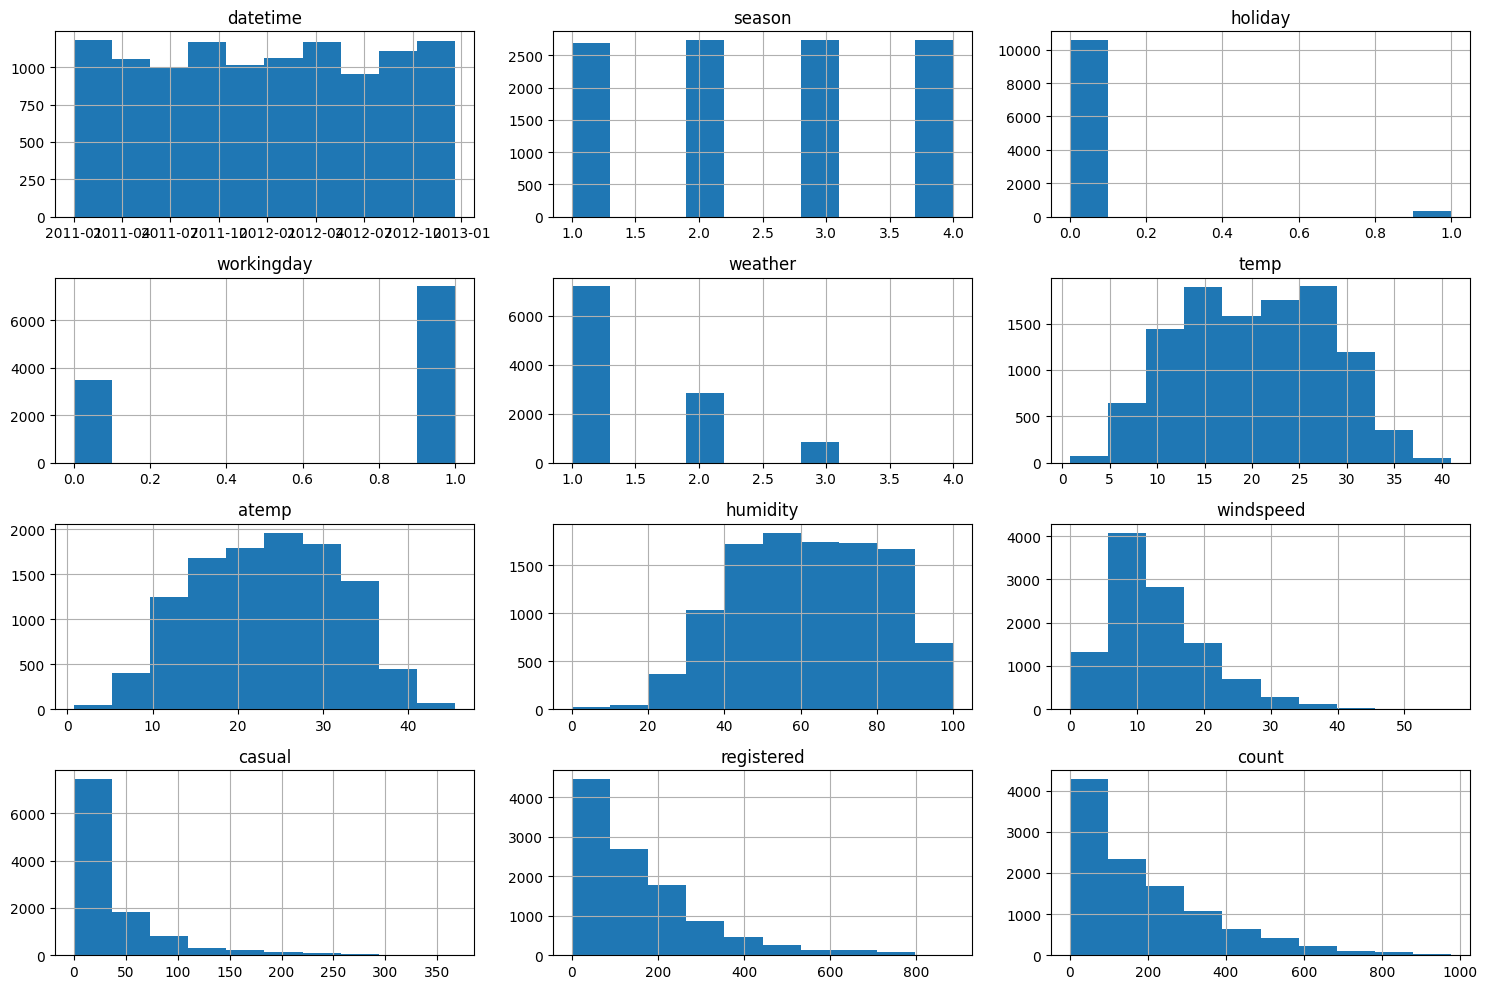

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. T
#his is part of the exploritory data analysis
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


In [ ]:
# create a new feature
# Define a function to extract year, month, day, and hour from datetime
def extract_datetime_features(df, datetime_column):
    df['year'] = df[datetime_column].dt.year
    df['month'] = df[datetime_column].dt.month
    df['day'] = df[datetime_column].dt.day
    df['hour'] = df[datetime_column].dt.hour


In [ ]:
# Apply the function to both train and test datasets
extract_datetime_features(train, 'datetime')
extract_datetime_features(test, 'datetime')

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


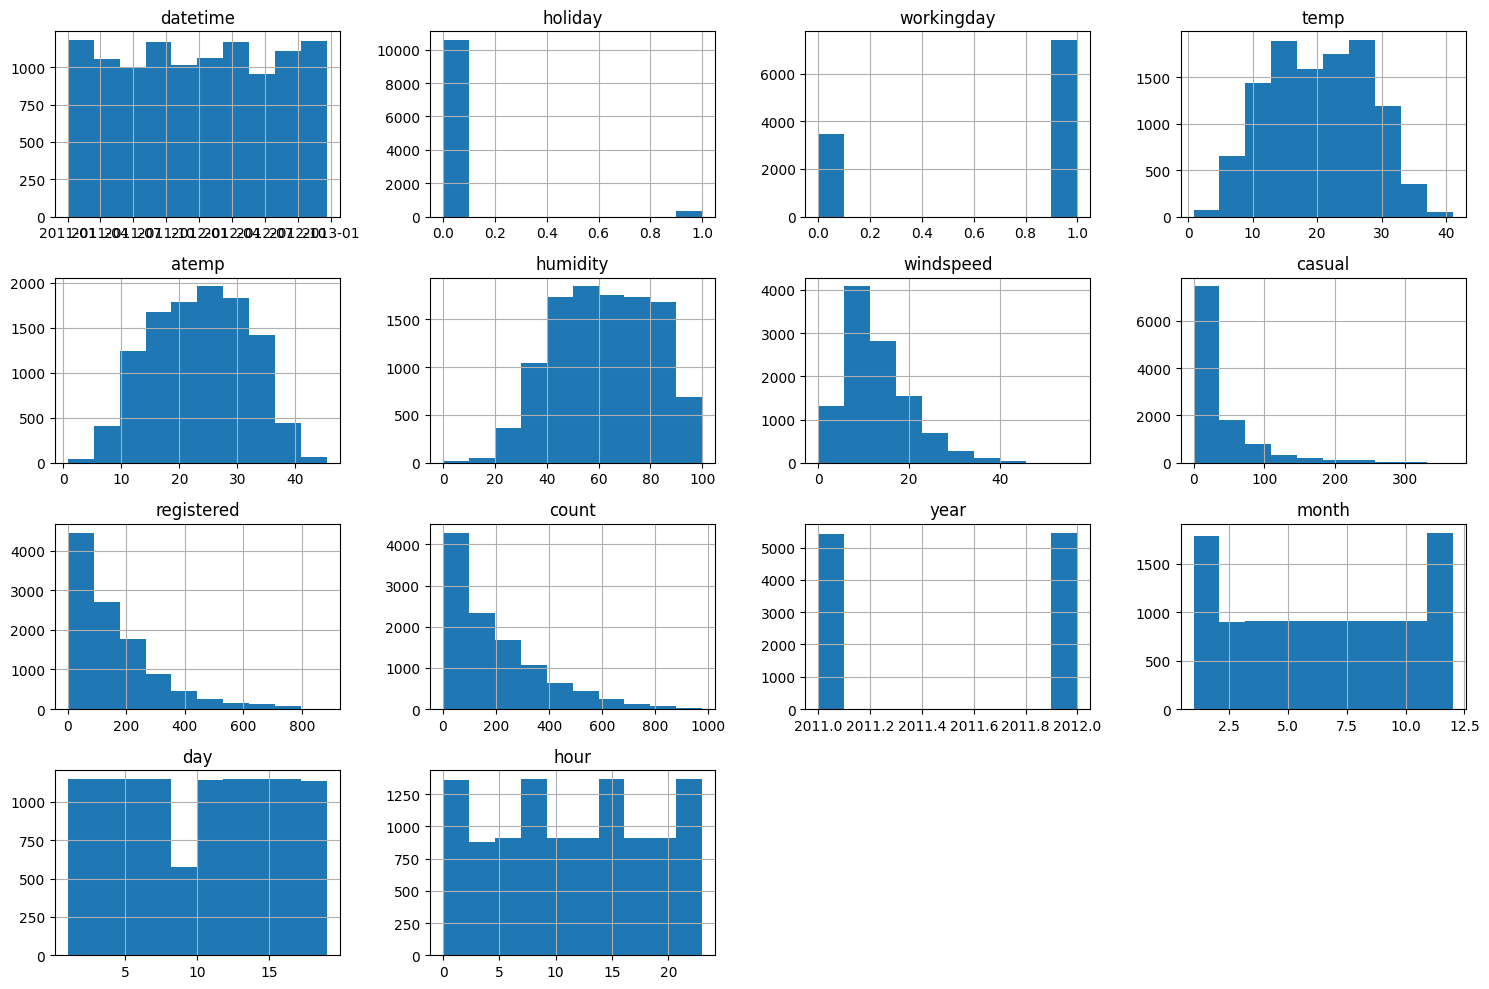

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_230159"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_230159/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 166 seconds

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.338193  root_mean_squared_error      29.905556  397.171175                0.001163           0.056715            3       True         12
1          LightGBM_BAG_L2  -30.677840  root_mean_squared_error      28.174870  313.134135                0.715968          31.088534            2       True         10
2        LightGBMXT_BAG_L2  -30.959681  root_mean_squared_error      28.519488  316.130968                1.060586          34.085366            2       True          9
3   RandomForestMSE_BAG_L2  -31.695600  root_mean_squared_error      28.127838  331.940559                0.668936          49.894958            2       True         11
4      WeightedEnsemble_L2  -32.355325  root_mean_squared_error      26.273913  270.619661   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.424983594881716,
  'CatBoost_BAG_L1': -36.00565921129625,
  'ExtraTreesMSE_BAG_L1': -38.10727767243523,
  'WeightedEnsemble_

In [ ]:
new_predictions = predictor_new_features.predict(test)
new_predictions.head()

0    15.918616
1     9.815781
2     9.024005
3     7.881235
4     6.607064
Name: count, dtype: float32

In [ ]:
# Set them to zero
# Set negative values to zero
new_predictions = new_predictions.clip(lower=0)

# Check if negative values have been set to zero
negative2_pred_count_after = (new_predictions< 0).sum()
print("Total negative prediction values after setting to zero:", negative2_pred_count_after)


Total negative prediction values after setting to zero: 0


In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 611kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-29 23:14:19  new features                       complete  0.61692      0.61692       
submission.csv               2024-04-29 22:56:42  first raw submission               complete  1.80837      1.80837       
submission_new_hpo.csv       2024-04-29 21:58:44  new features with hyperparameters  complete  0.6608       0.6608        


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
from autogluon.common import space

nn_options = {
    'num_epochs': 10,
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': space.Int(lower=26, upper=66, default=36),
}

hyperparameters = {
                   'NN_TORCH': {},
                   'GBM': gbm_options,
	'CAT': {'depth': space.Int(lower=4, upper=7, default=6)},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],}



num_trials = 5
search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit( train_data=train.drop(['casual', 'registered'], axis=1), time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_231437"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_231437/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 224 seconds

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-40.2554	 = Validation score   (-root_mean_squared_error)
	28.9s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 25.0s of the 345.62s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L1 ...
	-38.425	 = Validation score   (-root_mean_squared_error)
	26.95s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 25.0s of the 318.63s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-45.8541	 = Validation score   (-root_mean_squared_error)
	34.11s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 25.0s of the 284.42s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-38.1073	 = Validation score   (-root_mean_squared_error)
	12.13s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L1 ... Tuning model for up to 25.0s of the 272.24s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, i

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-34.8915	 = Validation score   (-root_mean_squared_error)
	35.21s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 25.0s of the 236.58s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparame

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-31.5942	 = Validation score   (-root_mean_squared_error)
	28.85s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 30.4s of the 207.38s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 ...
	-32.7369	 = Validation score   (-root_mean_squared_error)
	54.16s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 30.4s of the 153.15s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.14%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-32.4882	 = Validation score   (-root_mean_squared_error)
	39.7s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 30.4s of the 113.34s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-32.4977	 = Validation score   (-root_mean_squared_error)
	16.98s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L2 ... Tuning model for up to 30.4s of the 96.29s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in 

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.16%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-31.2471	 = Validation score   (-root_mean_squared_error)
	36.4s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 30.4s of the 59.74s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparamete

In [ ]:
predictor_new_hpo.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.956545  root_mean_squared_error       0.003112  242.596817                0.001300           0.040875            3       True         14
1        XGBoost_BAG_L2/T1  -31.247087  root_mean_squared_error       0.001497  174.007706                0.000185          36.396007            2       True         13
2       LightGBM_BAG_L2/T1  -31.594208  root_mean_squared_error       0.001460  166.463440                0.000148          28.851741            2       True          9
3       CatBoost_BAG_L2/T1  -32.488231  root_mean_squared_error       0.001478  177.308194                0.000166          39.696495            2       True         11
4     ExtraTreesMSE_BAG_L2  -32.497712  root_mean_squared_error       0.001549  154.590214   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBM_BAG_L1/T1': -40.255448619289915,
  'RandomForestMSE_BAG_L1': -38.424983594881716,
  'CatBoost_BAG_L1/T

In [ ]:
new_predictions_hpo = predictor_new_hpo.predict(test)

In [ ]:
new_predictions_hpo

0        15.553709
1         9.860720
2         9.892138
3         8.617739
4         7.966276
           ...    
6488    295.361816
6489    216.107422
6490    153.834045
6491    112.090439
6492     82.628113
Name: count, Length: 6493, dtype: float32

In [ ]:
# Set them to zero
# Set negative values to zero
new_predictions_hpo  = new_predictions_hpo .clip(lower=0)

# Check if negative values have been set to zero
negative3_pred_count_after = (new_predictions_hpo < 0).sum()
print("Total negative prediction values after setting to zero:", negative3_pred_count_after)


Total negative prediction values after setting to zero: 0


In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)



In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 457kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-29 23:25:02  new features with hyperparameters  complete  0.68872      0.68872       
submission_new_features.csv  2024-04-29 23:14:19  new features                       complete  0.61692      0.61692       
submission.csv               2024-04-29 22:56:42  first raw submission               complete  1.80837      1.80837       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

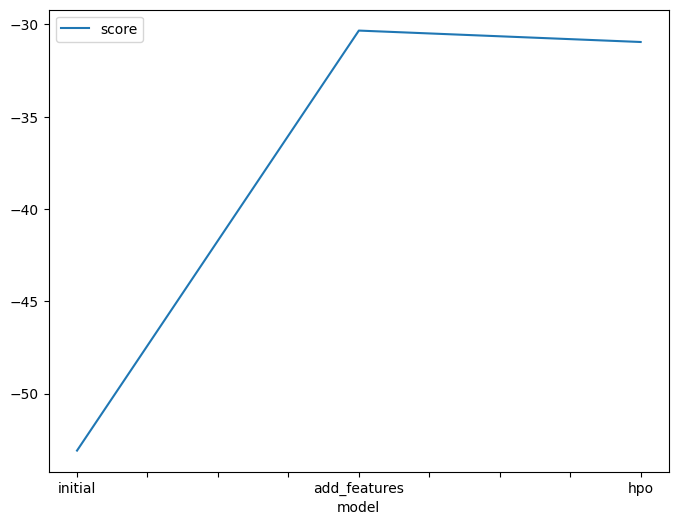

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.089702,-30.338193 , -30.956545 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

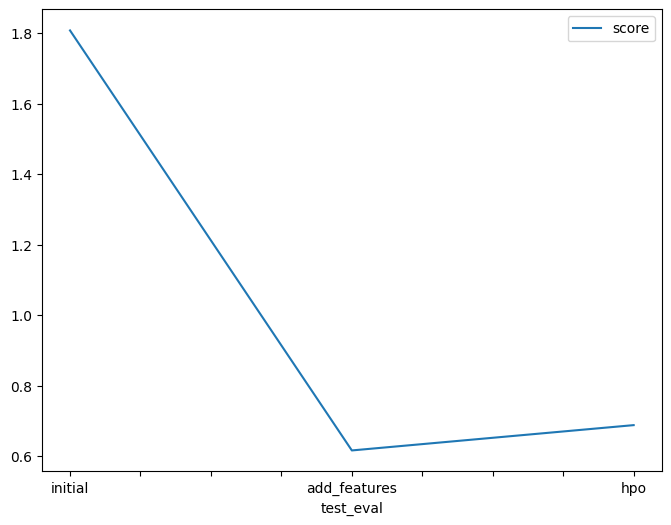

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [ 1.80837,0.61692 ,0.68872 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": ["time_limit = 600", "time_limit=600", "time_limit=600"],
    "presets": ["presets='best_quality'", "presets='best_quality'", "presets='best_quality'"],
    "hp-method": ["none", "problem_type = 'regression'", "tabular autogluon"],
    "score": [1.80837,0.61692 ,0.68872 ]
})


,model,timelimit,presets,hp-method,score
0,initial,time_limit = 600,presets='best_quality',none,1.80837
1,add_features,time_limit=600,presets='best_quality',problem_type = 'regression',0.61692
2,hpo,time_limit=600,presets='best_quality',tabular autogluon,0.68872
